In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

In [238]:
def plot_GPU_info(model_name = 'GPT-J', ut_type_idx = 0, data_type = 0):
    '''
    data type 0: MiB
    data type 1: %
    '''
    ut_type = ['memory.used','utilization.gpu', 'utilization.memory']
    unit_name = ' (MiB)' if data_type == 0 else ' %'
    imp_type = ['balanced load', 'sequential load', 'quantized', 'one GPU']
    ut_name = ['memory used','core utilization', 'memory I/O utilization']
    csv = f'GPU-record-{model_name}.csv'
    df = pd.read_csv(csv)
    data_list = []
    label_list = []
    coverage = 3 if model_name == 'GPT-Neo' else 4
    for i in range(coverage):
        for GPU in range(2):
            data_list.append(f'{ut_type[ut_type_idx]}{GPU}{i}')
            label_list.append(f'GPU{GPU} {imp_type[i]}')

    data_set = df[data_list]
    if data_type == 1:
        data_set *= 100

    plt.rc('axes', prop_cycle=(cycler('color', ['#00CC66','#11CC66','#0066CC','#1166CC','#6600CC','#6611CC','#CC0066','#CC1166']) + cycler('linestyle', ['--','-.','--','-.','--','-.','--','-.'])))
    plt.title(model_name + ' GPU '+ ut_name[ut_type_idx])
    plt.xlabel('time (s)')
    plt.ylabel(ut_name[ut_type_idx] + unit_name)
    plt.plot(data_set, linewidth=0.5)
    plt.legend(label_list, loc ="lower right")
    plt.show()
    
def plot_utilization(model_name = 'GPT-J', type_name = 0, GPU_MAX_MEM = 7680):

    unit_name = ' %'
    imp_type = ['balanced load', 'sequential load', 'quantized', 'one GPU']
    ut_type = ['utilization.gpu','memory.used', 'utilization.memory']
    ut_name = ['core utilization','memory used', 'memory I/O utilization']
    csv = f'GPU-record-{model_name}.csv'
    df = pd.read_csv(csv)
    data_list = []
    label_list = []
    for i in range(3):
        for GPU in range(2):
            data_list.append(f'{ut_type[i]}{GPU}{type_name}')
            label_list.append(f'GPU{GPU} {ut_name[i]}')

    data_set = df[data_list]
    
    memory_columns = [col for col in data_set.columns if 'memory.used' in col]
    data_set = data_set[(data_set[memory_columns] != 0).all(axis=1)]
    data_set[memory_columns] = data_set[memory_columns].apply(lambda x: x / GPU_MAX_MEM)
    data_set *= 100

    plt.rc('axes', prop_cycle=(cycler('color', ['#00CC66','#11CC66','#0066CC','#1166CC','#6600CC','#6611CC']) + cycler('linestyle', ['-','-.','-','-.','-','-.'])))
    plt.title(model_name + ' core and memory utilizaton with ' + imp_type[type_name])
    plt.xlabel('time (s)')
    plt.ylabel(imp_type[type_name] + unit_name)
    plt.plot(data_set, linewidth=0.9)
    plt.legend(label_list, loc ="lower right")
    plt.show()

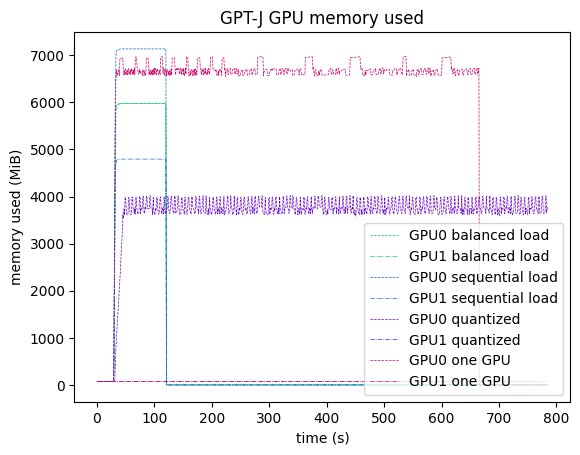

In [239]:
plot_GPU_info('GPT-J',0,0)

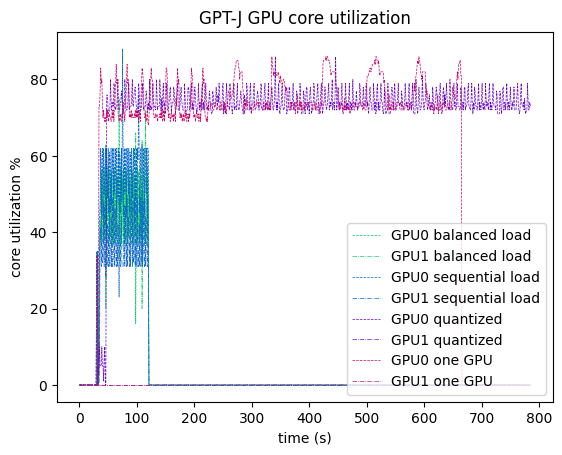

In [240]:
plot_GPU_info('GPT-J',1,1)

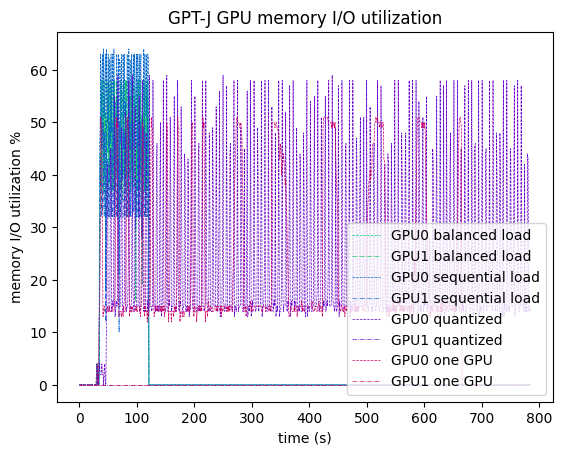

In [241]:
plot_GPU_info('GPT-J',2,1)

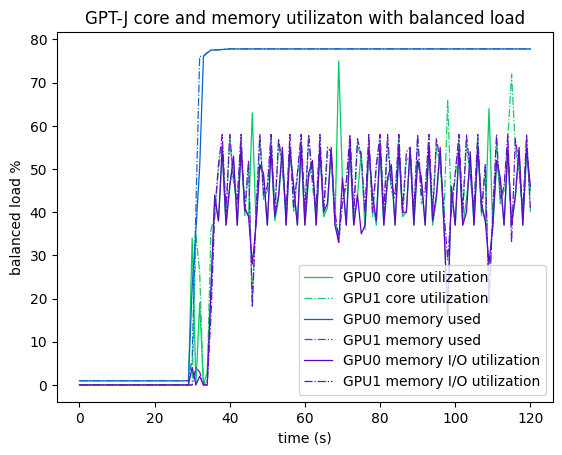

In [242]:
plot_utilization('GPT-J',  0)

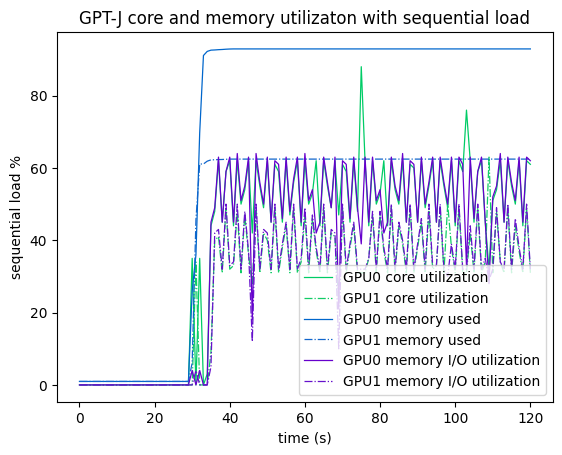

In [243]:
plot_utilization('GPT-J',  1)

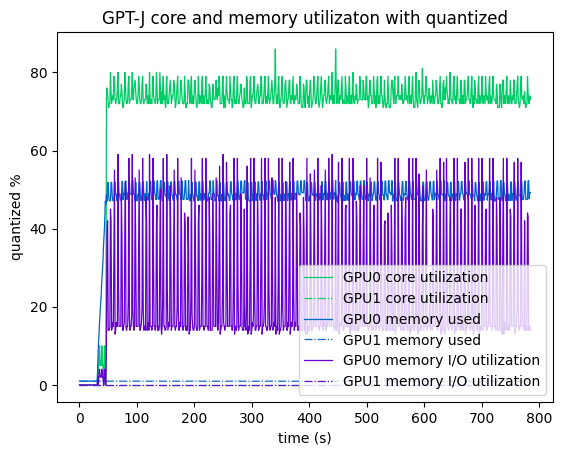

In [244]:
plot_utilization('GPT-J',  2)

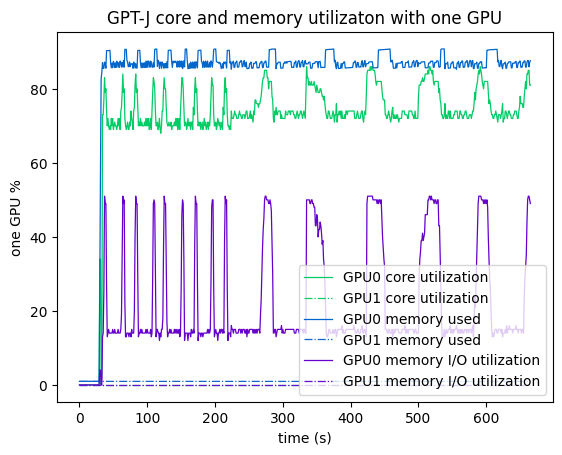

In [245]:
plot_utilization('GPT-J',  3)

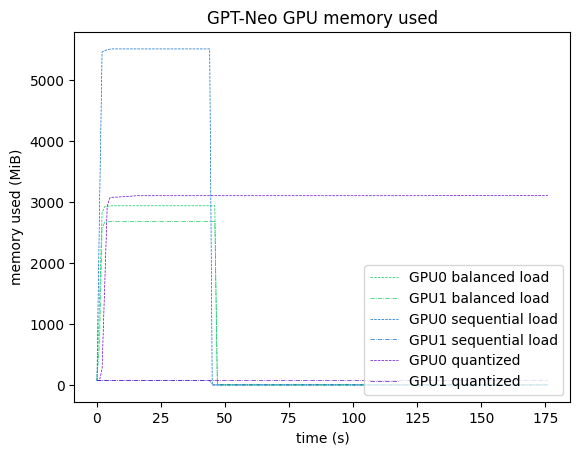

In [246]:
plot_GPU_info('GPT-Neo',0,0)

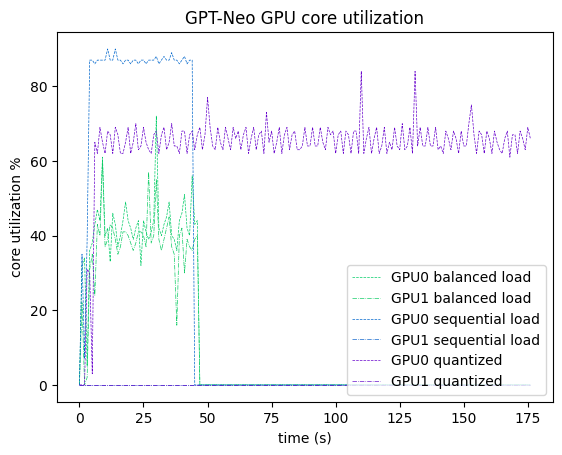

In [247]:
plot_GPU_info('GPT-Neo',1,1)

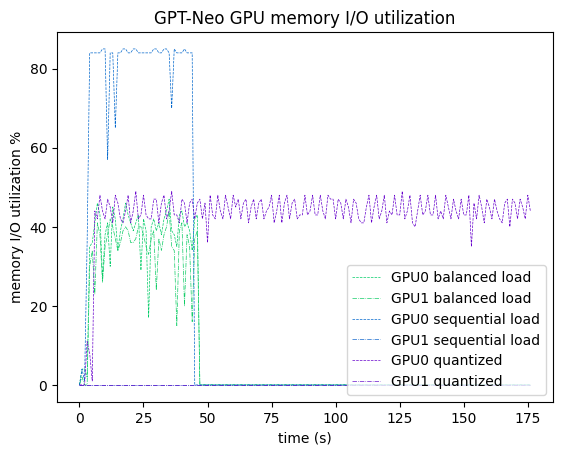

In [248]:
plot_GPU_info('GPT-Neo',2,1)

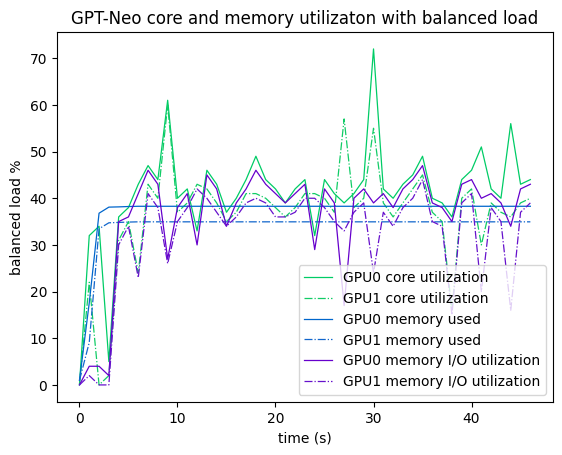

In [249]:
plot_utilization('GPT-Neo',  0)

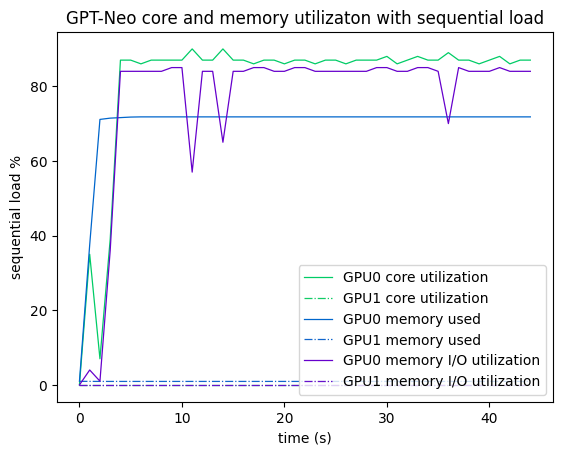

In [250]:
plot_utilization('GPT-Neo',  1)

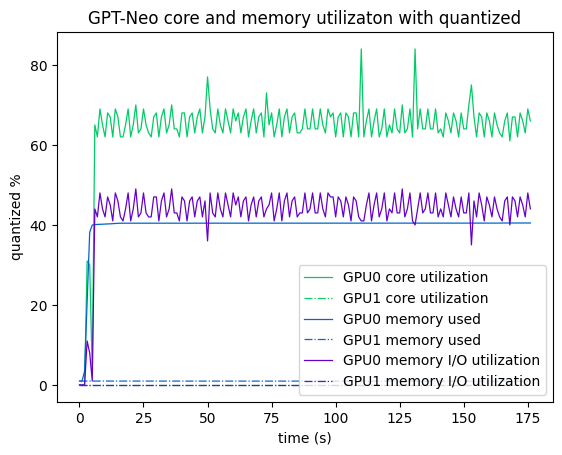

In [251]:
plot_utilization('GPT-Neo',  2)

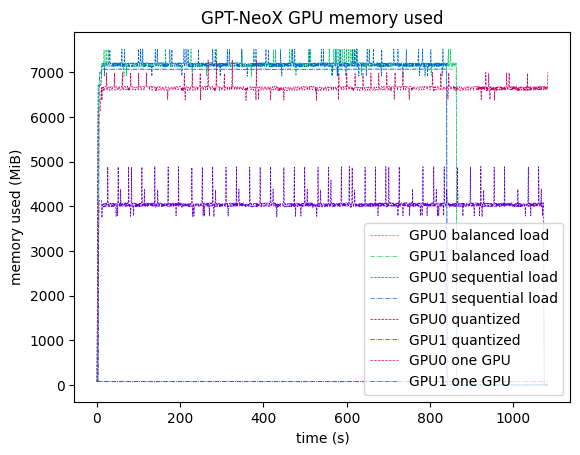

In [252]:
plot_GPU_info('GPT-NeoX',0,0)

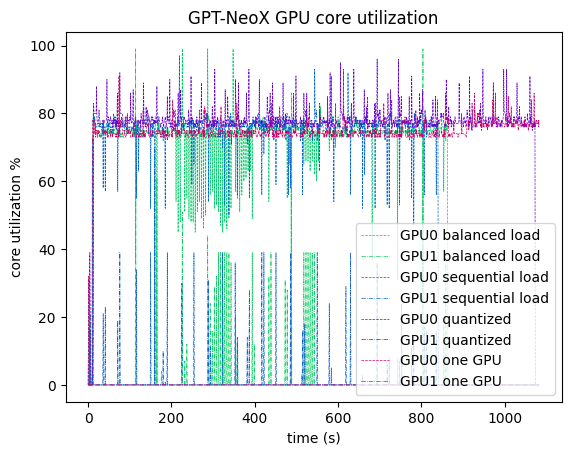

In [253]:
plot_GPU_info('GPT-NeoX',1,1)

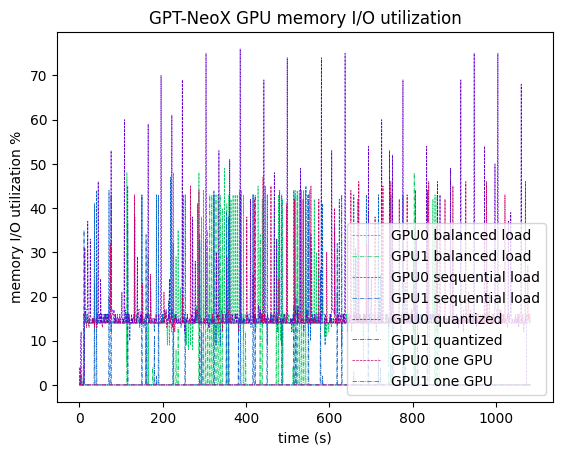

In [254]:
plot_GPU_info('GPT-NeoX',2,1)

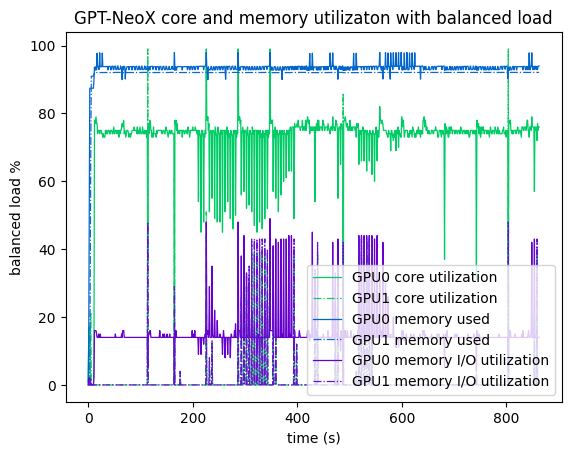

In [255]:
plot_utilization('GPT-NeoX',  0)

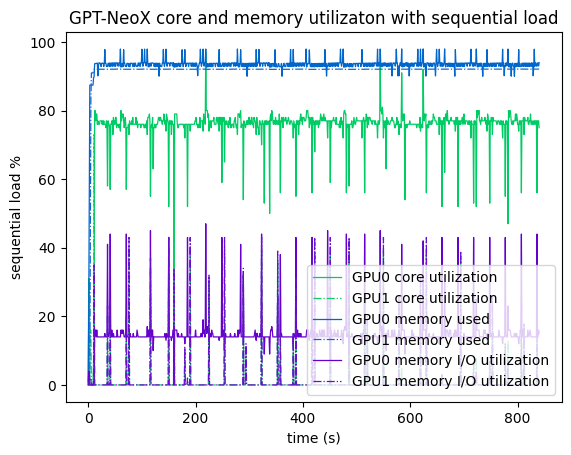

In [256]:
plot_utilization('GPT-NeoX',  1)

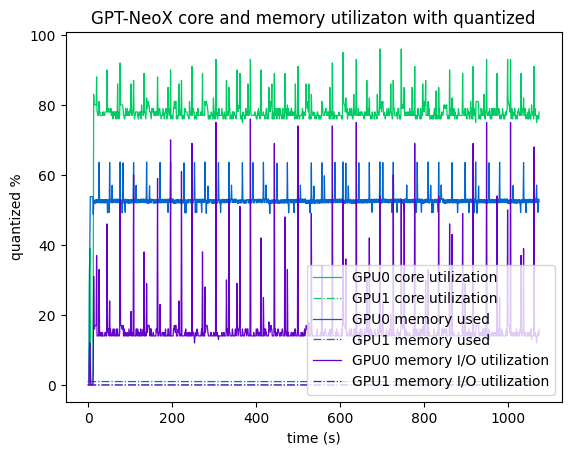

In [257]:
plot_utilization('GPT-NeoX',  2)

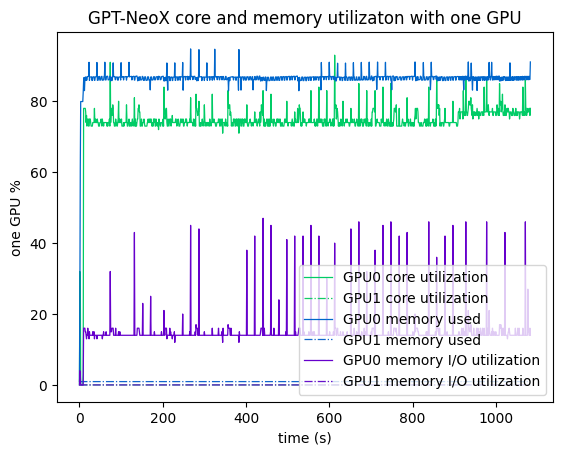

In [258]:
plot_utilization('GPT-NeoX',  3)

In [404]:
def plot_hist(data_avg, data_std, fig_title, y_label, plotting_func):

  if plotting_func == 0:
    x = [1,2,3]
    x_ticks = ['GPT-Neo','GPT-J', 'GPT-NeoX']
    color_palet = ['lightgray','plum','lightblue']
    x_label = 'Model'
  elif plotting_func == 1:
    x = [1,2,3,4]
    x_ticks = ['Balanced','Sequential', 'Quantized', 'Single-GPU']
    color_palet = ['lightgray','plum','lightblue','palegreen']
    x_label = 'Mapping Function'

  y = data_avg
  yerr = data_std
  width = 10
  height = 8
  plt.figure(figsize=(width, height))
  plt.bar(x, y, color=color_palet)
  plt.title(f'{fig_title}')
  plt.xticks(x, x_ticks)
  plt.xlabel(f'{x_label}')
  plt.ylabel(f'{y_label}')
  plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2, capthick=10, errorevery=1, alpha=0.5, ms=4, capsize = 2)

  ax = plt.gca()
  rects = ax.patches
  labels = [f'{i:0.2f} ± {j:0.2f}' for i,j in zip(y,yerr)]

  for rect, label in zip(rects, labels):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width() / 2, height/2, label, ha="center", va="center")

  plt.show()

In [405]:
def figure_maker_acrros_models(header, model_selection):
  pd_gptneo = pd.read_csv(f'result_GPT-Neo_{model_selection}.csv')
  pd_gptj = pd.read_csv(f'result_GPT-J_{model_selection}.csv')
  pd_gptnoex = pd.read_csv(f'result_GPT-NeoX_{model_selection}.csv')

  if model_selection == 0: title_suffix = "Auto/Balanced Mapping"
  elif model_selection == 1: title_suffix = "Sequential Mapping"
  elif model_selection == 2: title_suffix = "Quantized Mapping"
  elif model_selection == 3: title_suffix = "Single-GPU Mapping"

  if header == "Latency" :
    hdr_avg = "Latency ave (sec)"
    hdr_std = "Latency std (sec)"
    y_label = "Latency (sec)"
    fig_title = f"Latency across models using {title_suffix}"
  elif header == "Throughput":
    hdr_avg = "Throughput ave (bytes/sec)"
    hdr_std = "Throughput std (bytes/sec)"
    y_label = "Throughput (bytes/sec)"
    fig_title = f"Throughput across models using {title_suffix}"

  data_avg = []
  data_std = []

  for df in [pd_gptneo, pd_gptj, pd_gptnoex]:
    data_avg.append(np.mean(df[hdr_avg]))
    data_std.append(np.mean(df[hdr_std]))

  # Print Results
  list_modlel_name = [f'GPT-Neo_{model_selection}', f'GPT-J_{model_selection}', f'GPT-NeoX_{model_selection}']
  df_results = pd.DataFrame(zip(list_modlel_name, data_avg, data_std), columns=['Model', 'Average', 'Standard Deviation'])
  print(df_results)

  # Make Plot
  plot_hist(data_avg, data_std, fig_title, y_label, 0)
  print('\n')

In [409]:
def figure_maker_general(header = "Latency"):
    
    title_list = ['balanced','sequential','quantized','single GPU']
    x_ticks = ['GPT-Neo','GPT-J', 'GPT-NeoX']
    
    if header == "Latency" :
        hdr_avg = "Latency ave (sec)"
        hdr_std = "Latency std (sec)"
        y_label = "Latency (sec)"
        fig_title = f"Latency across models"
    elif header == "Throughput":
        hdr_avg = "Throughput ave (bytes/sec)"
        hdr_std = "Throughput std (bytes/sec)"
        y_label = "Throughput (bytes/sec)"
        fig_title = f"Throughput across models"
        
    x = [1,2,3]
    x_ticks = ['GPT-Neo','GPT-J', 'GPT-NeoX']
    color_palet = ['lightgray','plum','lightblue']
    x_label = 'Model'

    width = 3
    height = 4
    
    combined_results = pd.DataFrame(columns=['Model', 'Average', 'Standard Deviation'])
    
    for i in range(4):
        pd_gptneo = pd.read_csv(f'result_GPT-Neo_{i}.csv')
        pd_gptj = pd.read_csv(f'result_GPT-J_{i}.csv')
        pd_gptnoex = pd.read_csv(f'result_GPT-NeoX_{i}.csv')

        data_avg = []
        data_std = []

        for df in [pd_gptneo, pd_gptj, pd_gptnoex]:
            data_avg.append(np.mean(df[hdr_avg]))
            data_std.append(np.std(df[hdr_std]))  

        list_model_name = [f'GPT-Neo_{i}', f'GPT-J_{i}', f'GPT-NeoX_{i}']
        df_results = pd.DataFrame(zip(list_model_name, data_avg, data_std), columns=['Model', 'Average', 'Standard Deviation'])

        combined_results = pd.concat([combined_results, df_results], ignore_index=True)

    combined_results = combined_results.groupby('Model').agg({
        'Average': lambda x: ','.join(x.astype(str)),
        'Standard Deviation': lambda x: ','.join(x.astype(str))
        }).reset_index()
    # Print
    print(combined_results)
    
    combined_results_latency = {
    'balanced': ([2.96439692179362,5.777939526240031,56.93921389579773],[0.12663538673523653,0.14002280977328269,0.20539030903556865]),
    'sequential': ([2.7937672456105553,5.774358113606771,55.44506866137188],[0.1262553486852002,0.03537334182202293,0.05528269248147452]),
    'quantized': ([11.448548253377279,19.360623915990193,70.81223452885946],[0.10926116108941475,0.12679109248392592,0.06799926473336006]),
    'single GPU':([2.7891882737477625,42.236046361923215,71.68304893175761],[0.10894179547988861,0.2336239877509862,0.29070945238821266])
    }
    
    combined_results_thrput = {
    'balanced': ([26.949916930332865,13.8208130233425,1.4614592062689709],[1.1672493123968164,0.3669256806243445,0.004003071136887291]),
    'sequential': ([28.600501181131744,13.829379146312828,1.5034570780209755],[1.297947011247804,0.3801982361645852,0.0022788262751124756]),
    'quantized': ([6.977898832388765,4.127118081594442,1.1785466236747042],[0.0786434187550034,0.005582441704877584,0.001665044584100376]),
    'single GPU':([28.634840270202027,1.8901908051376313,1.162524878973911],[1.1513057995161924,0.010465793264282874,0.003956674084892337])
    }
    
    combined_results = combined_results_latency if header == "Latency" else combined_results_thrput
    
    x = np.arange(len(x_ticks))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0
    
    colors = ['lightgray','plum','lightblue','palegreen']

    fig, ax = plt.subplots(layout='constrained')
    plt.figure(figsize=(width, height))    
    
    for attribute, measurement in combined_results.items():
        print(measurement[0])
        color = colors[multiplier % len(colors)]
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement[0],width, label=attribute,color=color)
        ax.errorbar(x + offset, measurement[0], measurement[1], fmt='.', color='Black', elinewidth=2, capthick=10, errorevery=1, alpha=0.5, ms=4, capsize = 2)
        ax.bar_label(rects, label_type='center', fmt='%.1f')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if header == "Latency":
        ax.set_ylabel('Latency (s)')
        ax.set_title('Latency across models')
        ax.set_xticks(x + width*1.5, x_ticks)
        ax.legend(loc='upper left', ncols=4)
        ax.set_ylim(0, 90)
    else:
        ax.set_ylabel('Throughput (bytes/sec)')
        ax.set_title('Throughput across models')
        ax.set_xticks(x + width*1.5, x_ticks)
        ax.legend(loc='upper left', ncols=4)
        ax.set_ylim(0, 35)
    plt.show()

         Model             Average   Standard Deviation
0      GPT-J_0   5.777939526240031  0.14002280977328269
1      GPT-J_1   5.774358113606771   0.1455486089939953
2      GPT-J_2  19.360623915990193  0.03537334182202293
3      GPT-J_3  42.236046361923215   0.2336239877509862
4   GPT-NeoX_0   56.93921389579773  0.20539030903556865
5   GPT-NeoX_1   55.44506866137188  0.05528269248147452
6   GPT-NeoX_2   70.81223452885946  0.06799926473336006
7   GPT-NeoX_3   71.68304893175761  0.29070945238821266
8    GPT-Neo_0    2.96439692179362  0.12663538673523653
9    GPT-Neo_1  2.7937672456105553   0.1262553486852002
10   GPT-Neo_2  11.448548253377279  0.10926116108941475
11   GPT-Neo_3  2.7891882737477625  0.10894179547988861
[2.96439692179362, 5.777939526240031, 56.93921389579773]
[2.7937672456105553, 5.774358113606771, 55.44506866137188]
[11.448548253377279, 19.360623915990193, 70.81223452885946]
[2.7891882737477625, 42.236046361923215, 71.68304893175761]


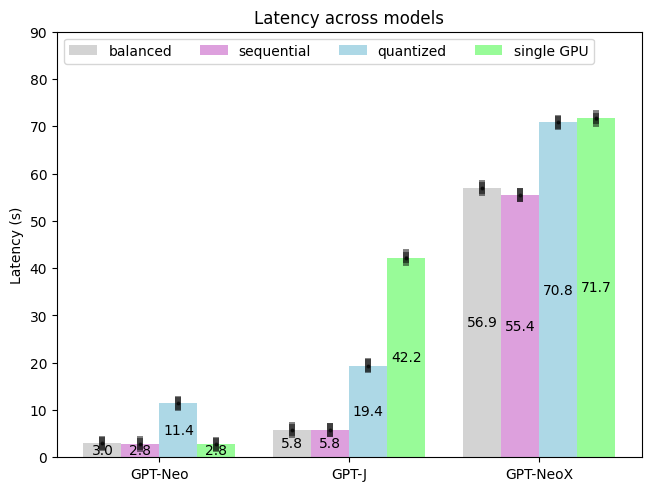

<Figure size 20x400 with 0 Axes>

In [410]:
figure_maker_general("Latency")

         Model             Average     Standard Deviation
0      GPT-J_0    13.8208130233425     0.3669256806243445
1      GPT-J_1  13.829379146312828     0.3801982361645852
2      GPT-J_2   4.127118081594442   0.005582441704877584
3      GPT-J_3  1.8901908051376313   0.010465793264282874
4   GPT-NeoX_0  1.4614592062689709   0.004003071136887291
5   GPT-NeoX_1  1.5034570780209755  0.0022788262751124756
6   GPT-NeoX_2  1.1785466236747042   0.001665044584100376
7   GPT-NeoX_3   1.162524878973911   0.003956674084892337
8    GPT-Neo_0  26.949916930332865     1.1672493123968164
9    GPT-Neo_1  28.600501181131744      1.297947011247804
10   GPT-Neo_2   6.977898832388765     0.0786434187550034
11   GPT-Neo_3  28.634840270202027     1.1513057995161924
[26.949916930332865, 13.8208130233425, 1.4614592062689709]
[28.600501181131744, 13.829379146312828, 1.5034570780209755]
[6.977898832388765, 4.127118081594442, 1.1785466236747042]
[28.634840270202027, 1.8901908051376313, 1.162524878973911]


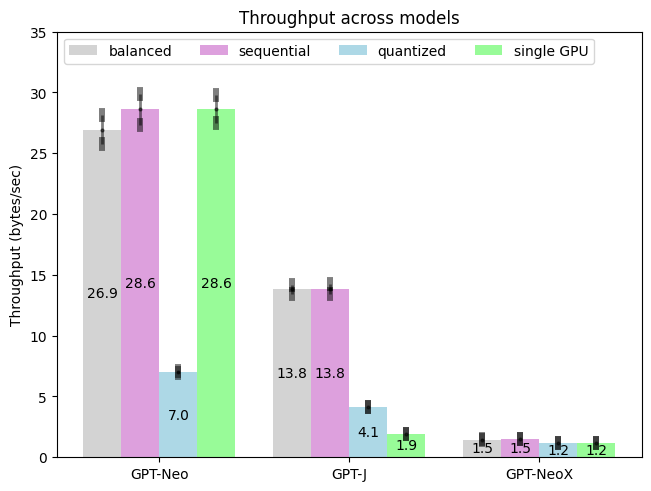

<Figure size 20x400 with 0 Axes>

In [411]:
figure_maker_general("Throughput")

        Model    Average  Standard Deviation
0   GPT-Neo_0   2.964397            0.064961
1     GPT-J_0   5.777940            0.070585
2  GPT-NeoX_0  56.939214            0.236020


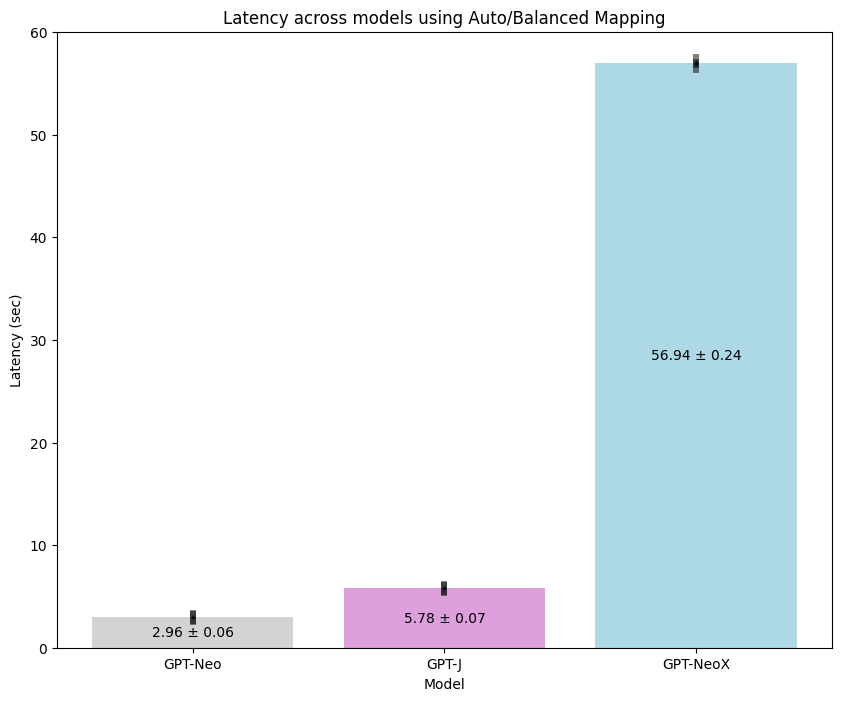



        Model    Average  Standard Deviation
0   GPT-Neo_1   2.793767            0.063829
1     GPT-J_1   5.774358            0.073534
2  GPT-NeoX_1  55.445069            0.058650


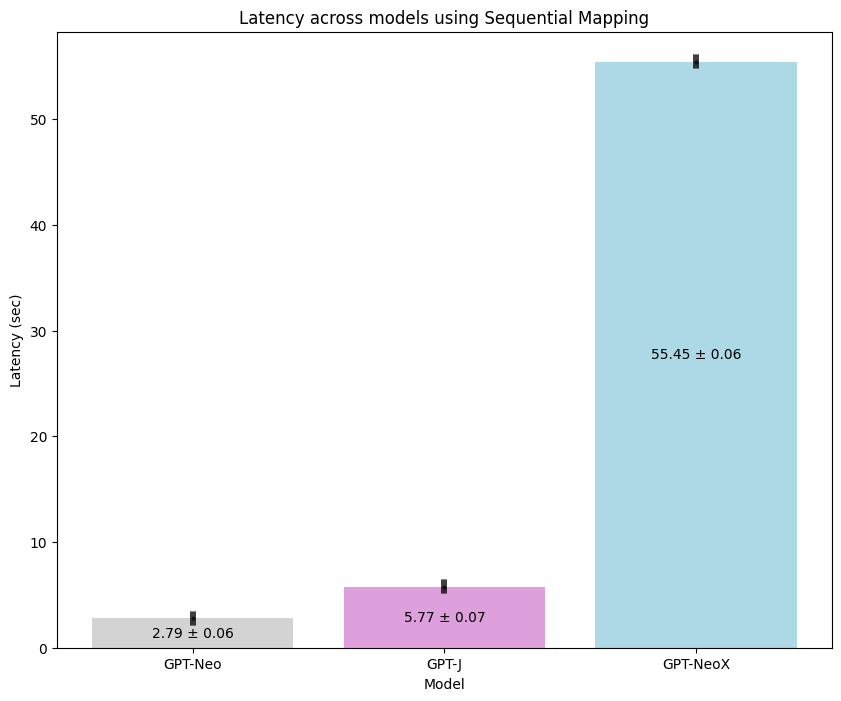



        Model    Average  Standard Deviation
0   GPT-Neo_2  11.448548            0.065430
1     GPT-J_2  49.373677            0.092208
2  GPT-NeoX_2  70.812235            0.073171


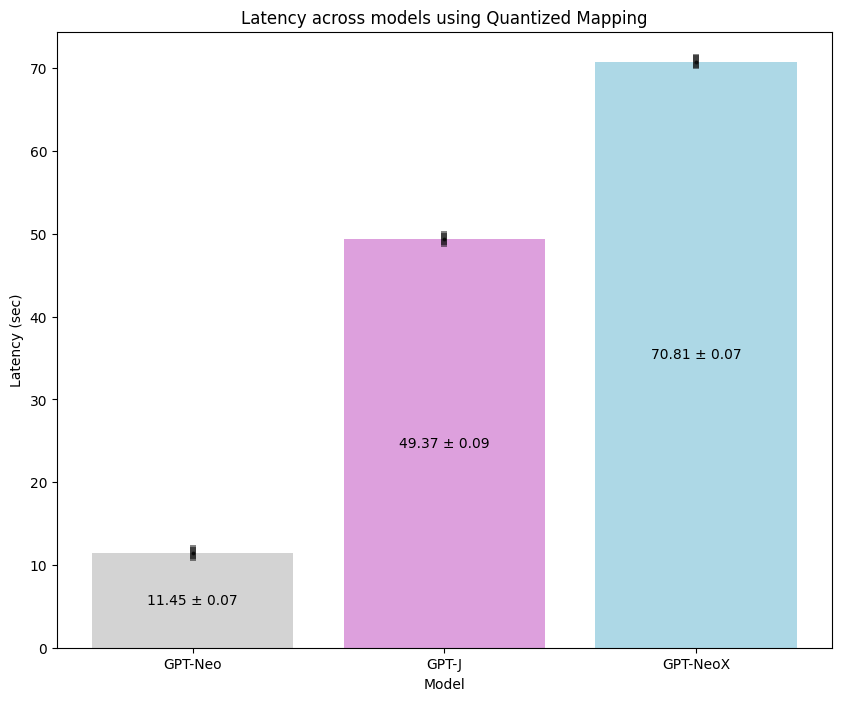



        Model    Average  Standard Deviation
0   GPT-Neo_3   2.789188            0.055022
1     GPT-J_3  42.236046            0.179479
2  GPT-NeoX_3  71.683049            0.195449


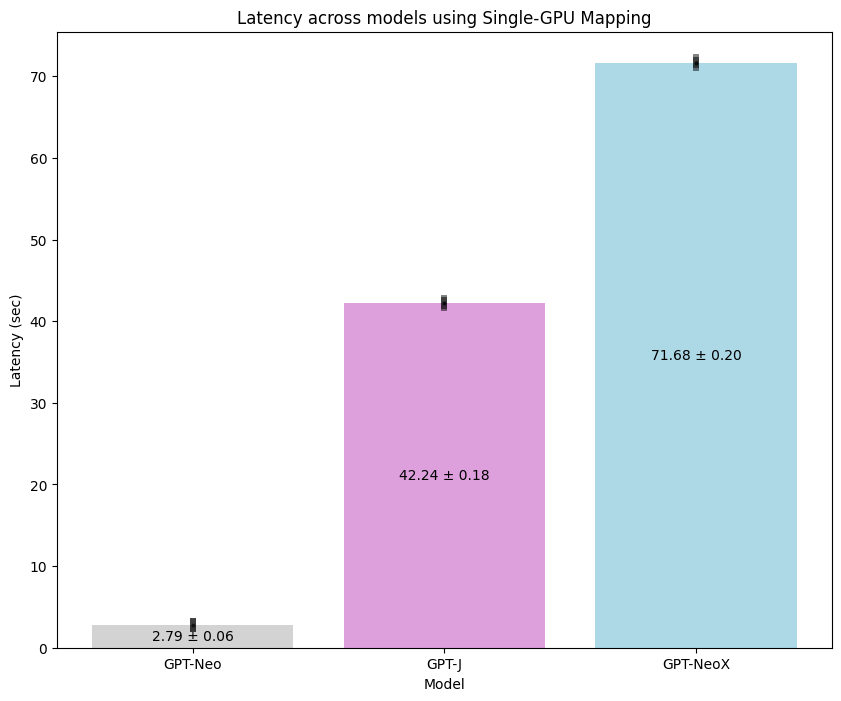



        Model    Average  Standard Deviation
0   GPT-Neo_0  26.949917            0.598259
1     GPT-J_0  13.820813            0.184699
2  GPT-NeoX_0   1.461459            0.004863


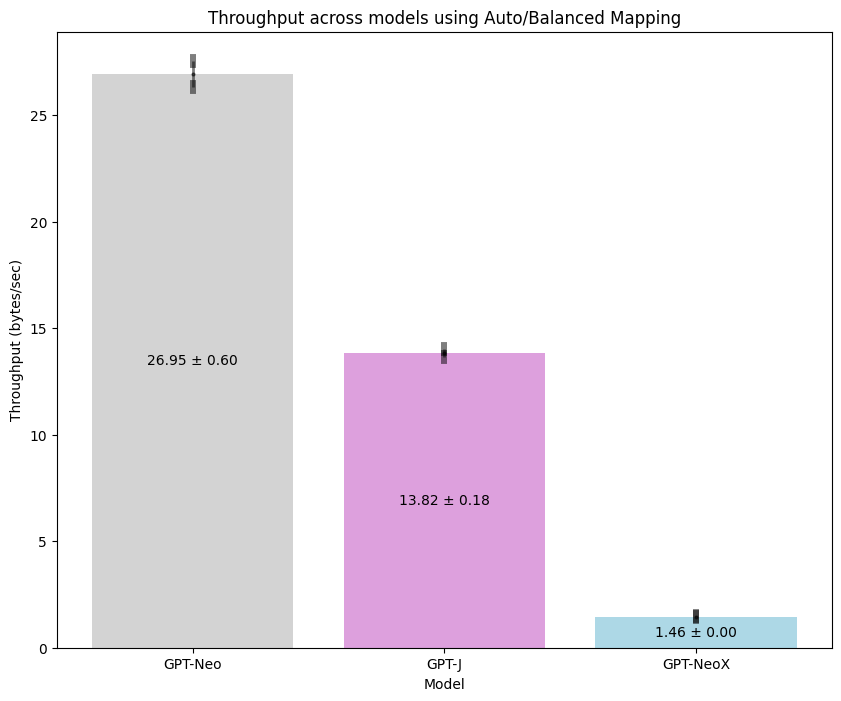



        Model    Average  Standard Deviation
0   GPT-Neo_1  28.600501            0.655733
1     GPT-J_1  13.829379            0.191962
2  GPT-NeoX_1   1.503457            0.002115


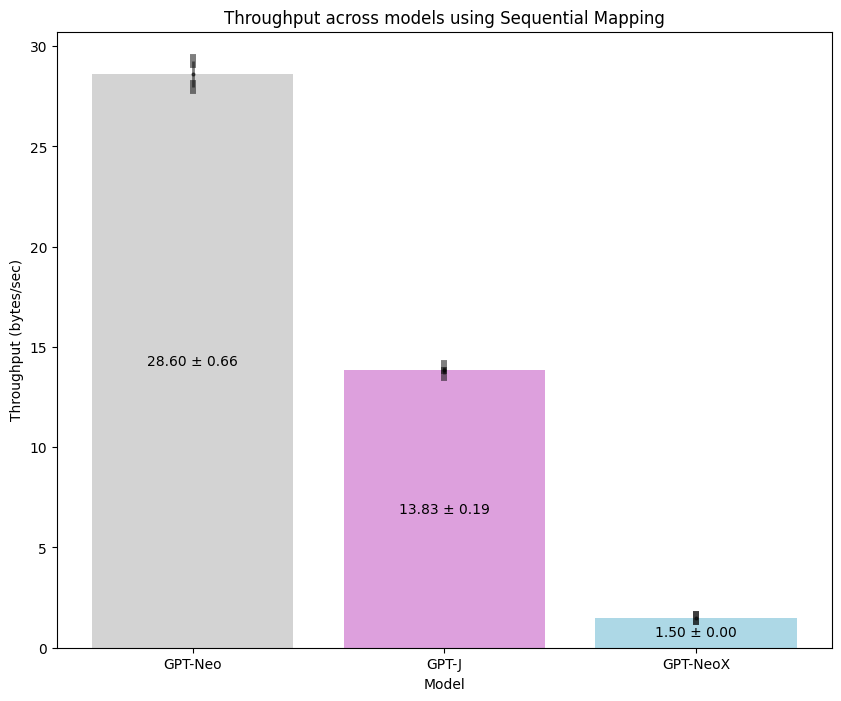



        Model   Average  Standard Deviation
0   GPT-Neo_2  6.977899            0.045926
1     GPT-J_2  1.618441            0.003421
2  GPT-NeoX_2  1.178547            0.001483


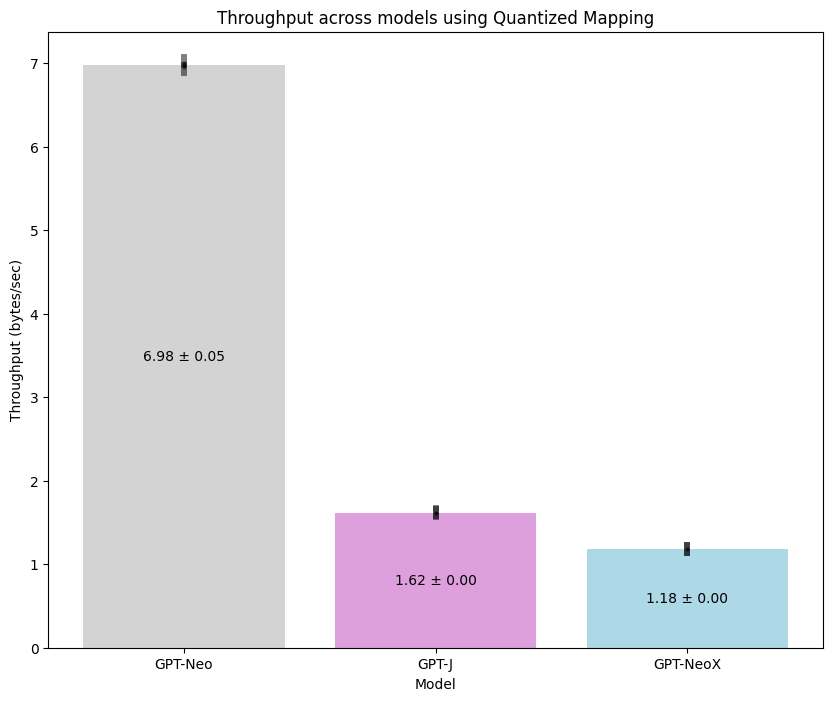



        Model    Average  Standard Deviation
0   GPT-Neo_3  28.634840            0.581417
1     GPT-J_3   1.890191            0.008294
2  GPT-NeoX_3   1.162525            0.002990


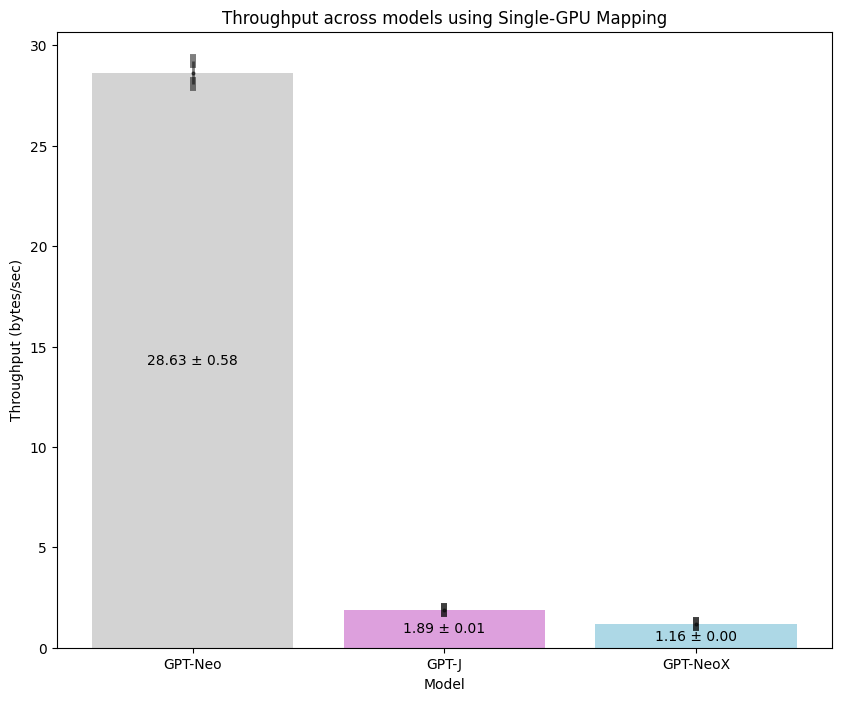

In [4]:
header_list = ["Latency", "Throughput"]
model_selection = [0, 1, 2, 3]

for header, model_selection in [(x,y) for x in header_list for y in model_selection]:
  figure_maker_acrros_models(header, model_selection)

In [5]:
def figure_maker_acrros_mapping(header, model_selection):
  pd_0 = pd.read_csv(f'result_{model_selection}_0.csv')
  pd_1 = pd.read_csv(f'result_{model_selection}_1.csv')
  pd_2 = pd.read_csv(f'result_{model_selection}_2.csv')
  pd_3 = pd.read_csv(f'result_{model_selection}_3.csv')

  if header == "Latency" :
    hdr_avg = "Latency ave (sec)"
    hdr_std = "Latency std (sec)"
    y_label = "Latency (sec)"
    fig_title = f"Latency using different Mapping fuctions for {model_selection}"
  elif header == "Throughput":
    hdr_avg = "Throughput ave (bytes/sec)"
    hdr_std = "Throughput std (bytes/sec)"
    y_label = "Throughput (bytes/sec)"
    fig_title = f"Throughput using different Mapping fuctions for {model_selection}"

  data_avg = []
  data_std = []

  for df in [pd_0, pd_1, pd_2, pd_3]:
    data_avg.append(np.mean(df[hdr_avg]))
    data_std.append(np.mean(df[hdr_std]))

  # Print Results
  list_modlel_name = [f'{model_selection}_0', f'{model_selection}_1', f'{model_selection}_2', f'{model_selection}_3']
  df_results = pd.DataFrame(zip(list_modlel_name, data_avg, data_std), columns=['Model', 'Average', 'Standard Deviation'])
  print(df_results)

  # Make Plot
  plot_hist(data_avg, data_std, fig_title, y_label, 1)
  print('\n')

       Model    Average  Standard Deviation
0  GPT-Neo_0   2.964397            0.064961
1  GPT-Neo_1   2.793767            0.063829
2  GPT-Neo_2  11.448548            0.065430
3  GPT-Neo_3   2.789188            0.055022


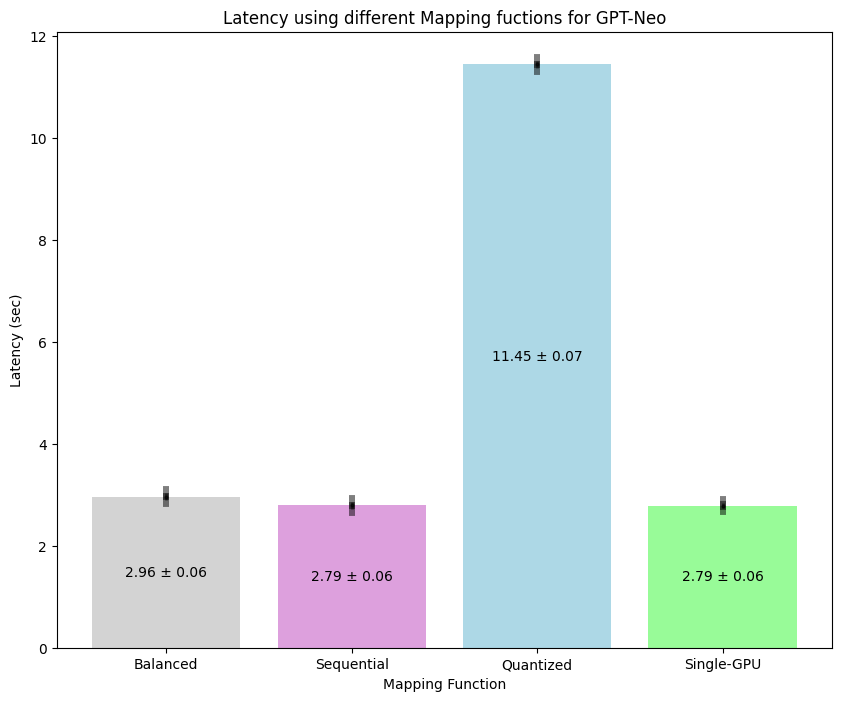



     Model    Average  Standard Deviation
0  GPT-J_0   5.777940            0.070585
1  GPT-J_1   5.774358            0.073534
2  GPT-J_2  49.373677            0.092208
3  GPT-J_3  42.236046            0.179479


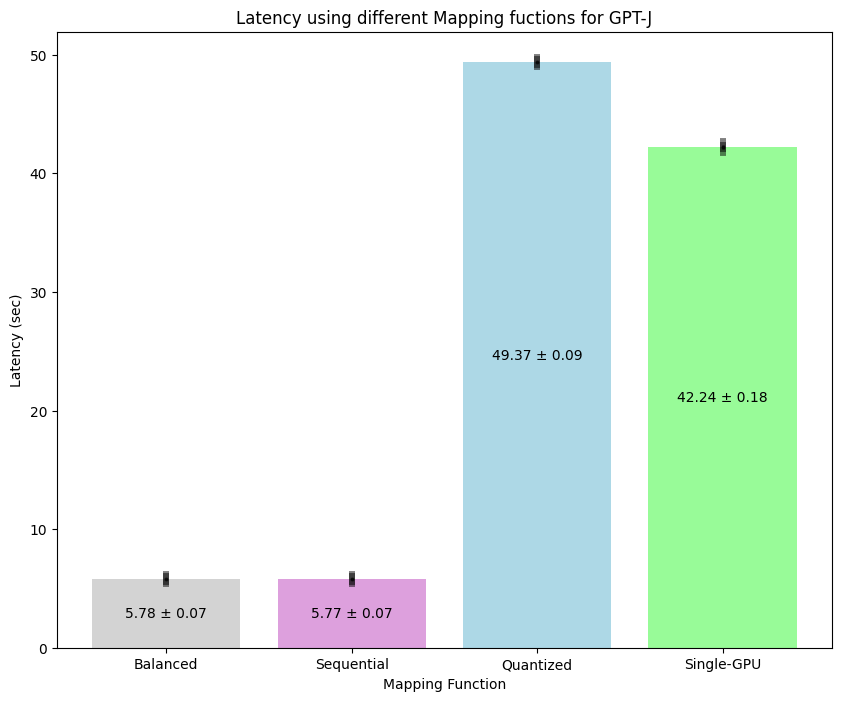



        Model    Average  Standard Deviation
0  GPT-NeoX_0  56.939214            0.236020
1  GPT-NeoX_1  55.445069            0.058650
2  GPT-NeoX_2  70.812235            0.073171
3  GPT-NeoX_3  71.683049            0.195449


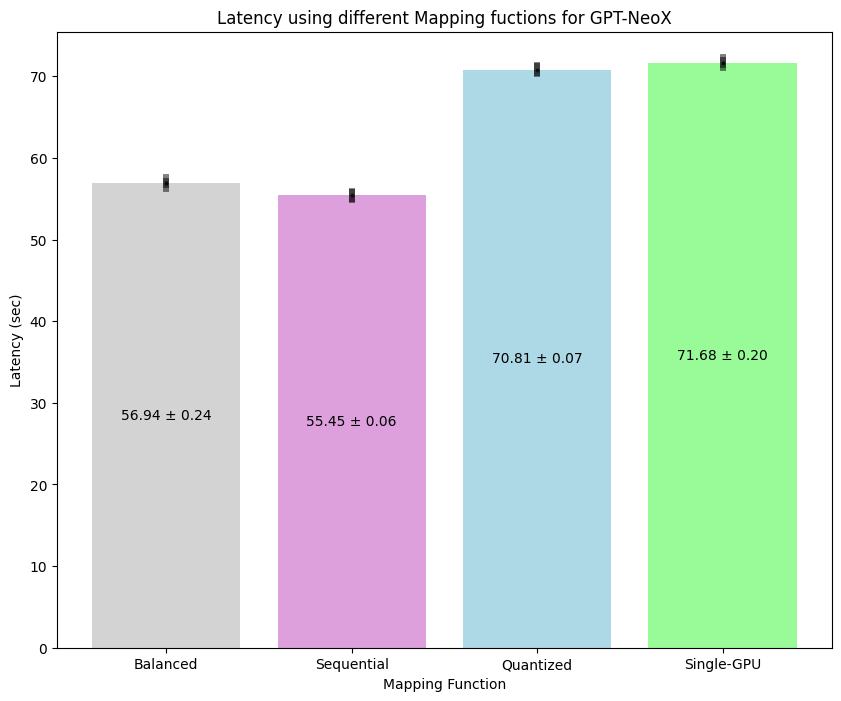



       Model    Average  Standard Deviation
0  GPT-Neo_0  26.949917            0.598259
1  GPT-Neo_1  28.600501            0.655733
2  GPT-Neo_2   6.977899            0.045926
3  GPT-Neo_3  28.634840            0.581417


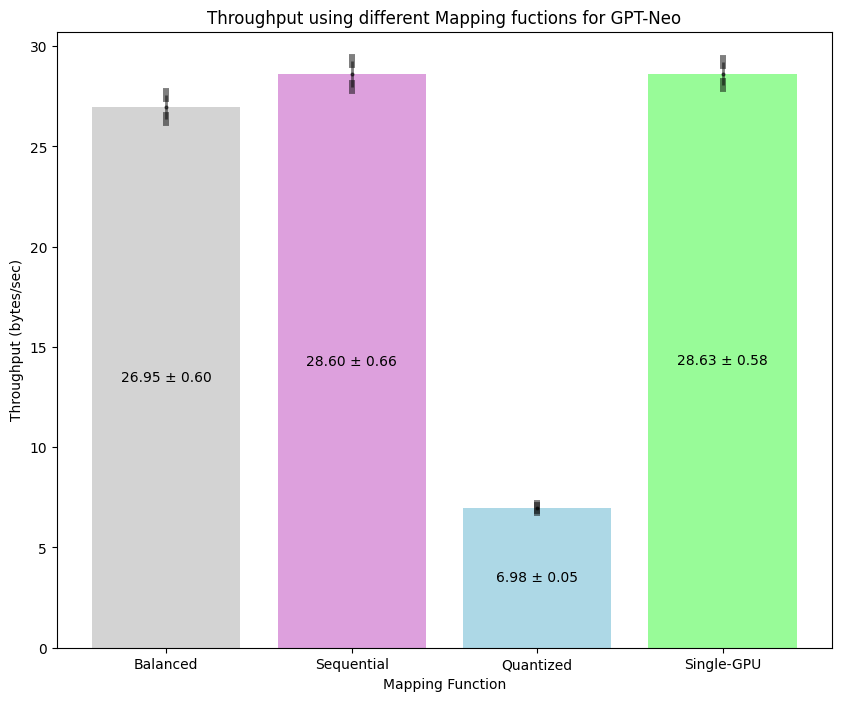



     Model    Average  Standard Deviation
0  GPT-J_0  13.820813            0.184699
1  GPT-J_1  13.829379            0.191962
2  GPT-J_2   1.618441            0.003421
3  GPT-J_3   1.890191            0.008294


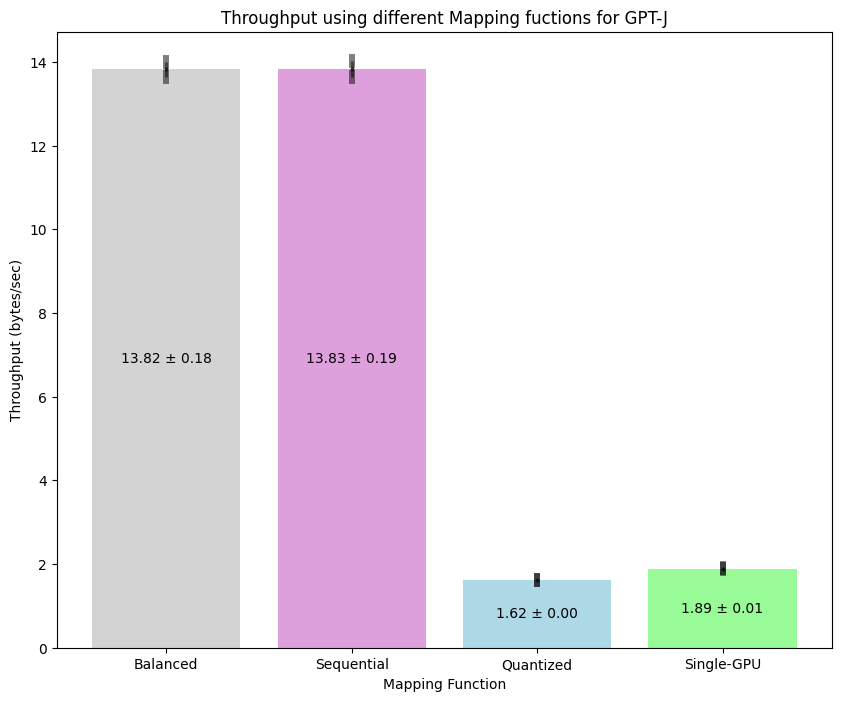



        Model   Average  Standard Deviation
0  GPT-NeoX_0  1.461459            0.004863
1  GPT-NeoX_1  1.503457            0.002115
2  GPT-NeoX_2  1.178547            0.001483
3  GPT-NeoX_3  1.162525            0.002990


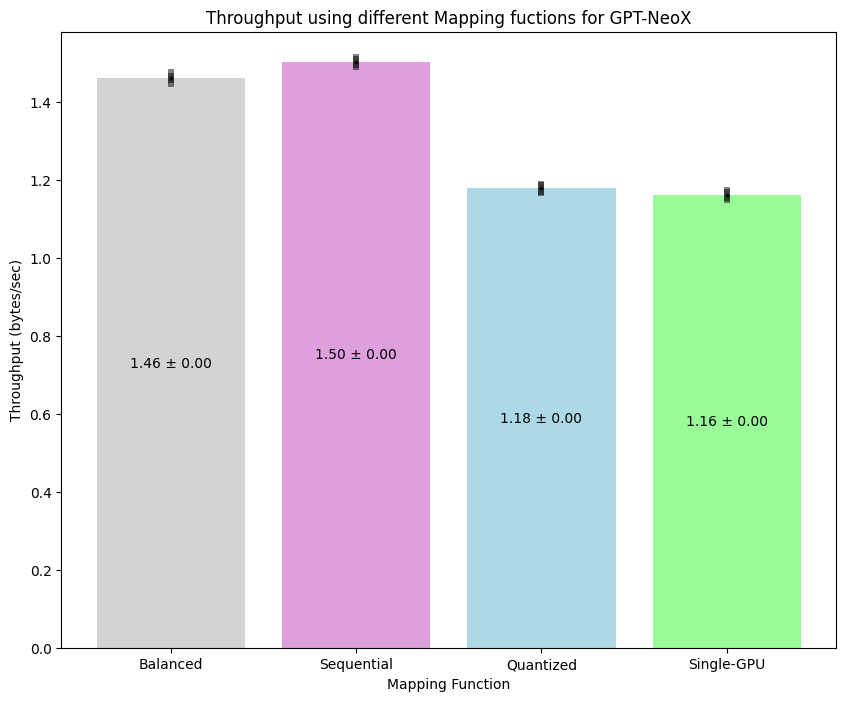

In [6]:
header_list = ["Latency", "Throughput"]
model_selection = ["GPT-Neo", "GPT-J", "GPT-NeoX"]

for header, model_selection in [(x,y) for x in header_list for y in model_selection]:
  figure_maker_acrros_mapping(header, model_selection)

In [7]:
def plot_GPU_memory_across_model(data, mapping_func):

  # Sample data
  groups = ['GPU-1', 'GPU-2']
  categories = ['Used', 'Free']

  # Colors for each model
  colors = {
      'GPT-Neo': {'Used': 'red', 'Free': 'blue'},
      'GPT-J': {'Used': 'green', 'Free': 'yellow'},
      'GPT-NeoX': {'Used': 'sienna', 'Free': 'coral'}
  }

  bar_width = 0.2
  index = np.arange(len(groups))

  # Set Figure Size
  plt.figure(figsize=(10, 8)) #(width,height)

  # Plotting the bars
  for i, (model, model_data) in enumerate(data.items()):
      # Offset for each model
      offset = [x + bar_width * i for x in index]

      # Plotting each category (Free, Used) for the model
      for category in categories:
          bottom_data = model_data['Used'] if category == 'Free' else None
          plt.bar(offset, model_data[category], bar_width, bottom=bottom_data,
                  color=colors[model][category], label=f"{model} {category}")

          # Adding labels on each bar
          for j, value in enumerate(model_data[category]):
              position = sum([data[model][cat][j] for cat in categories if cat >= category]) - (value / 2)
              plt.text(offset[j], position, str(value), ha='center', va='center')

  # Setting the x-axis labels
  plt.xticks([r + bar_width for r in range(len(groups))], groups)
  plt.xlabel('GPU')
  plt.ylabel('Memory Usage [GB]')
  plt.title(f'GPU Memory Usage by Model and Category using {mapping_func}')

  # Creating legend
  plt.legend()

  # Show plot
  plt.show()


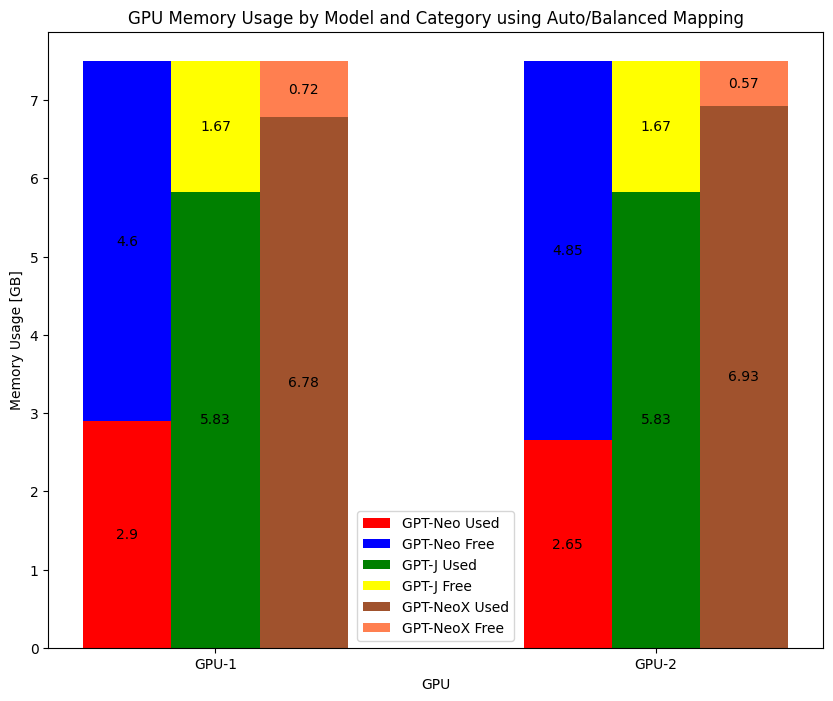

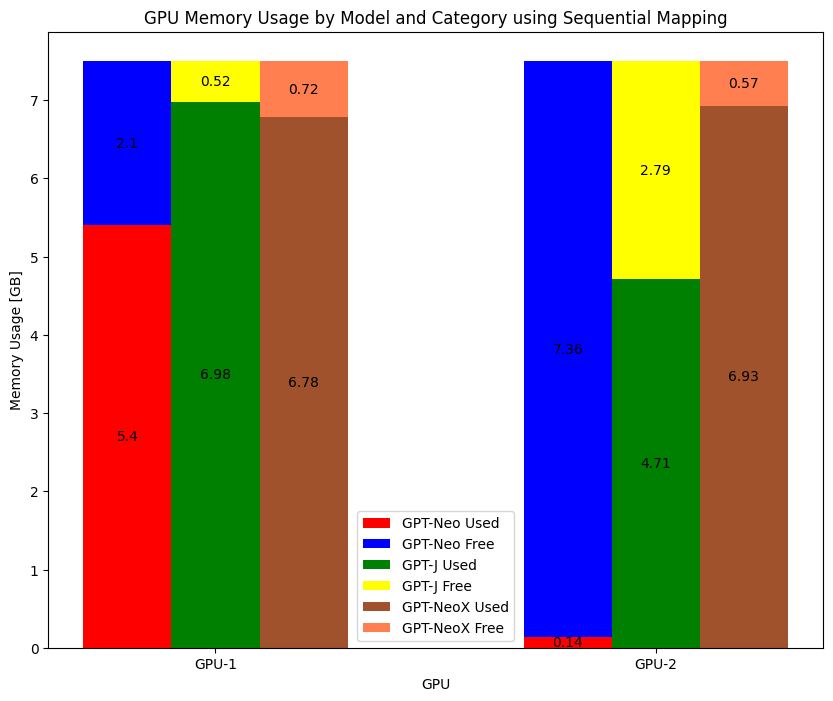

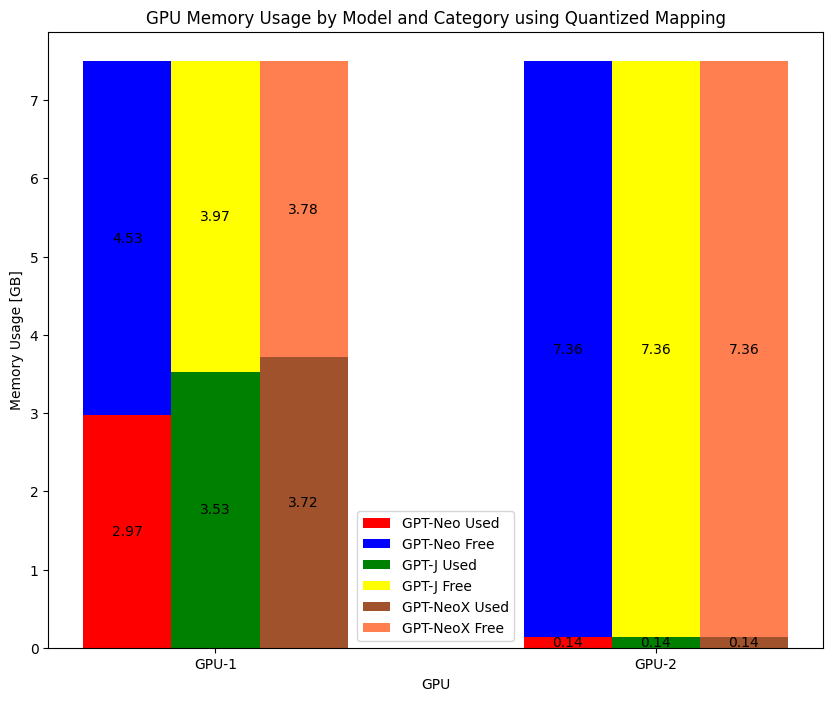

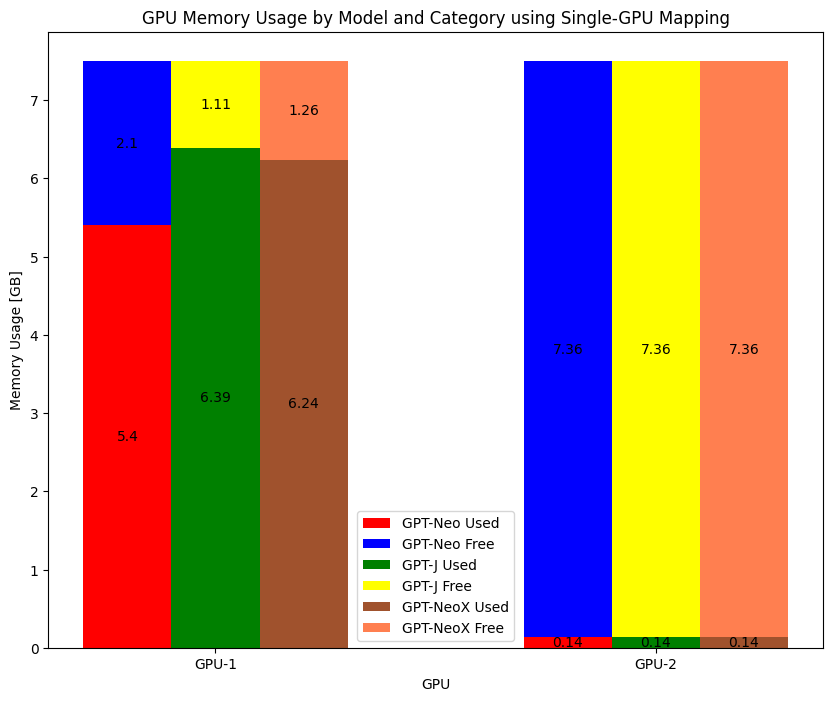

In [8]:
data_0 = {'GPT-Neo': {'Used': [2.90, 2.65], 'Free': [4.60, 4.85]},
          'GPT-J': {'Used': [5.83, 5.83], 'Free': [1.67, 1.67]},
          'GPT-NeoX': {'Used': [6.78, 6.93], 'Free': [0.72, 0.57]} }

data_1 = {'GPT-Neo': {'Used': [5.40, 0.14], 'Free': [2.10, 7.36]},
          'GPT-J': {'Used': [6.98, 4.71], 'Free': [0.52, 2.79]},
          'GPT-NeoX': {'Used': [6.78, 6.93], 'Free': [0.72, 0.57]} }

data_2 = {'GPT-Neo': {'Used': [2.97, 0.14], 'Free': [4.53, 7.36]},
          'GPT-J': {'Used': [3.53, 0.14], 'Free': [3.97, 7.36]},
          'GPT-NeoX': {'Used': [3.72, 0.14], 'Free': [3.78, 7.36]} }

data_3 = {'GPT-Neo': {'Used': [5.40, 0.14], 'Free': [2.10, 7.36]},
          'GPT-J': {'Used': [6.39, 0.14], 'Free': [1.11, 7.36]},
          'GPT-NeoX': {'Used': [6.24, 0.14], 'Free': [1.26, 7.36]} }

mapping_func = ["Auto/Balanced Mapping", "Sequential Mapping", "Quantized Mapping", "Single-GPU Mapping"]


for data, mapping_func in zip([data_0, data_1, data_2, data_3], mapping_func) :
  plot_GPU_memory_across_model(data, mapping_func)
  print('\n')

In [9]:
def plot_GPU_memory_across_mapping(data, model_func):

  # Sample data
  groups = ['GPU-1', 'GPU-2']
  categories = ['Used', 'Free']

  # Colors for each model
  colors = {
      'Auto/Balanced': {'Used': 'red', 'Free': 'blue'},
      'Sequential': {'Used': 'green', 'Free': 'yellow'},
      'Quantized': {'Used': 'sienna', 'Free': 'coral'},
      'Single-GPU': {'Used': 'crimson', 'Free': 'violet'}
  }

  bar_width = 0.2
  index = np.arange(len(groups))

  # Set Figure Size
  plt.figure(figsize=(10, 8)) #(width,height)

  # Plotting the bars
  for i, (model, model_data) in enumerate(data.items()):
      # Offset for each model
      offset = [x + bar_width * i for x in index]

      # Plotting each category (Free, Used) for the model
      for category in categories:
          bottom_data = model_data['Used'] if category == 'Free' else None
          plt.bar(offset, model_data[category], bar_width, bottom=bottom_data,
                  color=colors[model][category], label=f"{model} {category}")

          # Adding labels on each bar
          for j, value in enumerate(model_data[category]):
              position = sum([data[model][cat][j] for cat in categories if cat >= category]) - (value / 2)
              plt.text(offset[j], position, str(value), ha='center', va='center')

  # Setting the x-axis labels
  plt.xticks([r + bar_width for r in range(len(groups))], groups)
  plt.xlabel('GPU')
  plt.ylabel('Memory Usage [GB]')
  plt.title(f'GPU Memory Usage by Mapping Function and Category for {model_func}')

  # Creating legend
  plt.legend(loc='best')

  # Show plot
  plt.show()

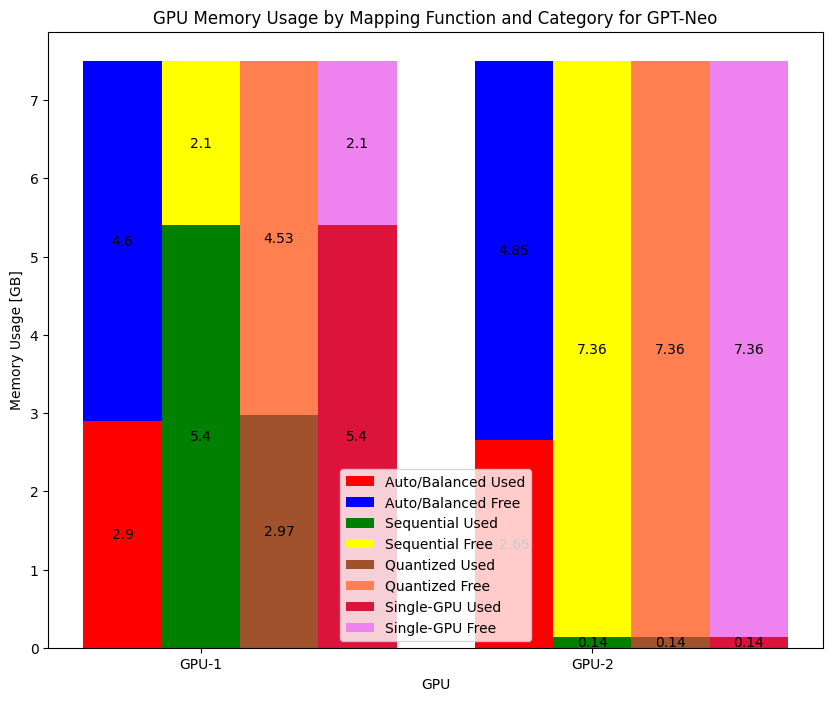

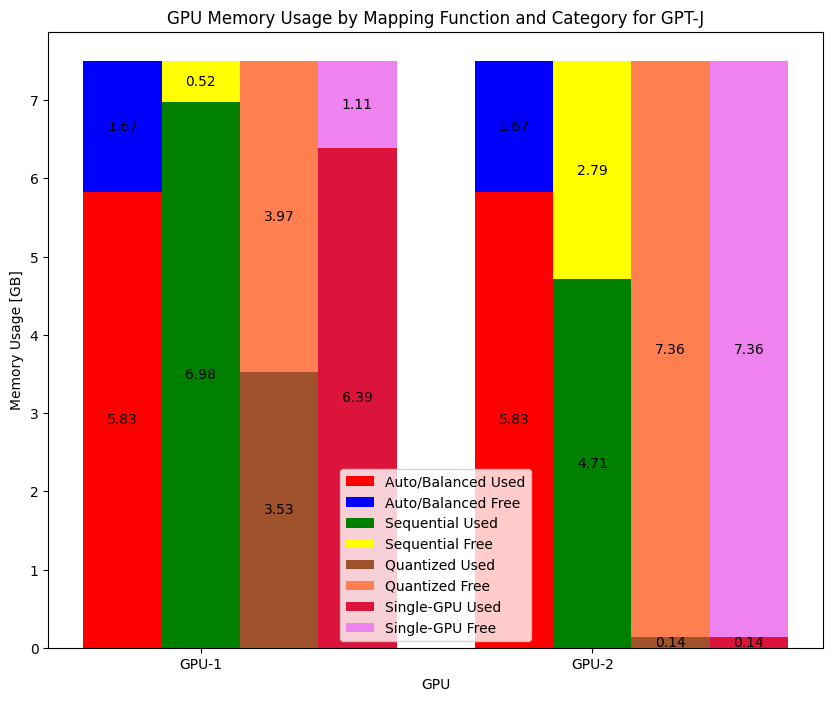

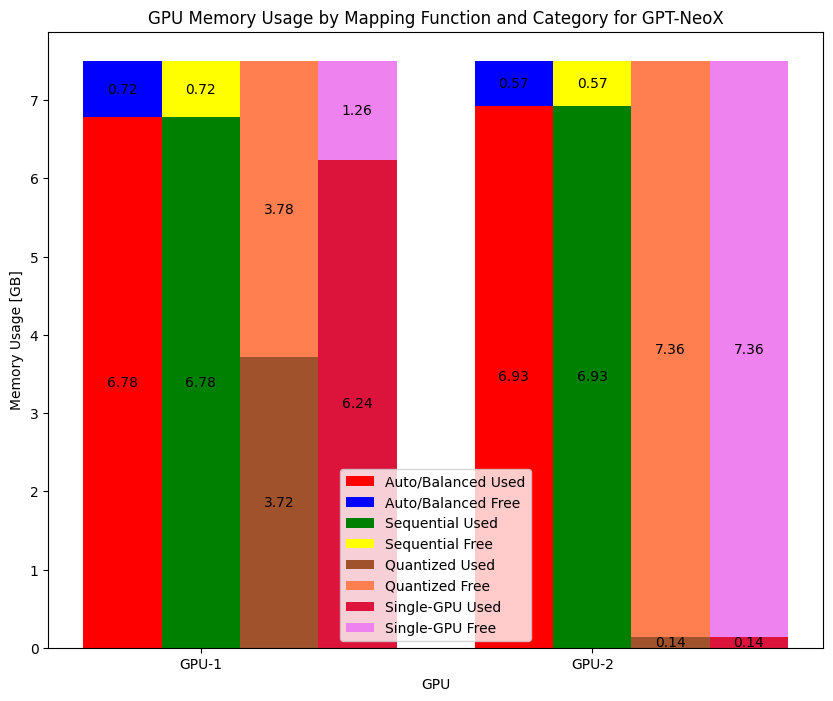

In [11]:
data_GPTNEO = {'Auto/Balanced': {'Used': [2.90, 2.65], 'Free': [4.60, 4.85]},
               'Sequential': {'Used': [5.40, 0.14], 'Free': [2.10, 7.36]},
               'Quantized': {'Used': [2.97, 0.14], 'Free': [4.53, 7.36]},
               'Single-GPU': {'Used': [5.40, 0.14], 'Free': [2.10, 7.36]} }

data_GPTJ = {'Auto/Balanced': {'Used': [5.83, 5.83], 'Free': [1.67, 1.67]},
             'Sequential': {'Used': [6.98, 4.71], 'Free': [0.52, 2.79]},
             'Quantized': {'Used': [3.53, 0.14], 'Free': [3.97, 7.36]},
             'Single-GPU': {'Used': [6.39, 0.14], 'Free': [1.11, 7.36]} }

data_GPTNEOX = {'Auto/Balanced': {'Used': [6.78, 6.93], 'Free': [0.72, 0.57]},
                'Sequential': {'Used': [6.78, 6.93], 'Free': [0.72, 0.57]},
                'Quantized': {'Used': [3.72, 0.14], 'Free': [3.78, 7.36]},
                'Single-GPU': {'Used': [6.24, 0.14], 'Free': [1.26, 7.36]} }

model_func = ["GPT-Neo", "GPT-J", "GPT-NeoX"]


for data, mapping_func in zip([data_GPTNEO, data_GPTJ, data_GPTNEOX], model_func) :
  plot_GPU_memory_across_mapping(data, mapping_func)
  print('\n')